<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Air_quality_index_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Project Name: Air Quality Index Predictor

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv("AQI Data.csv")


In [4]:
df.head()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [5]:
df.isnull().sum()


T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
df=df.dropna()


In [7]:
df.nunique()


T         243
TM        238
Tm        223
SLP       253
H          76
VV         22
V          94
VM         27
PM 2.5    555
dtype: int64

In [8]:
print(df.dtypes)
print("Shape :",df.shape)

T         float64
TM        float64
Tm        float64
SLP       float64
H         float64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object
Shape : (1092, 9)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


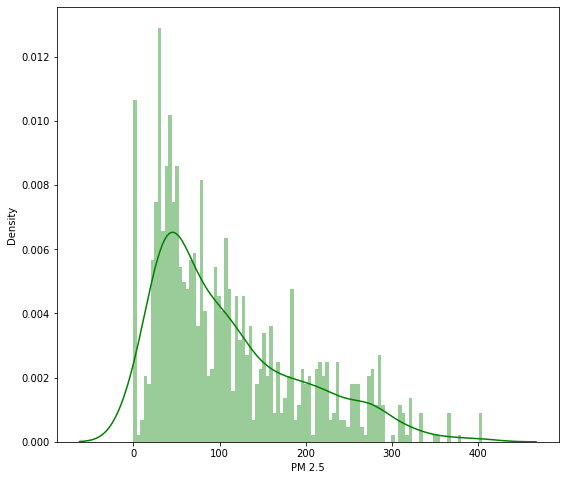

In [9]:
plt.figure(figsize=(9, 8))
sns.distplot(df['PM 2.5'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [10]:
col= df.columns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

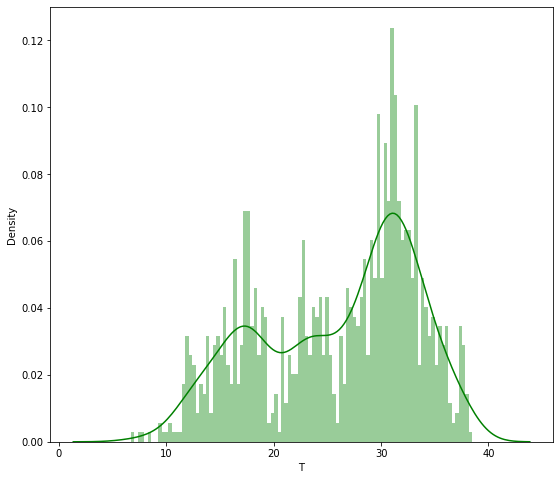

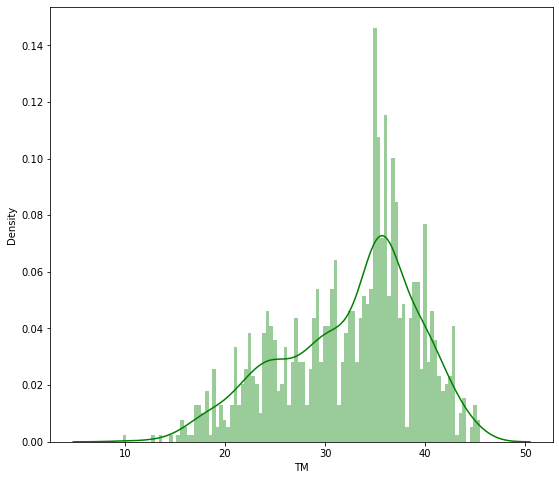

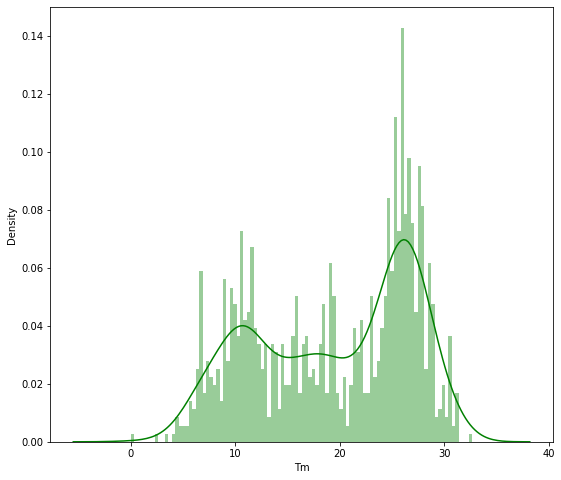

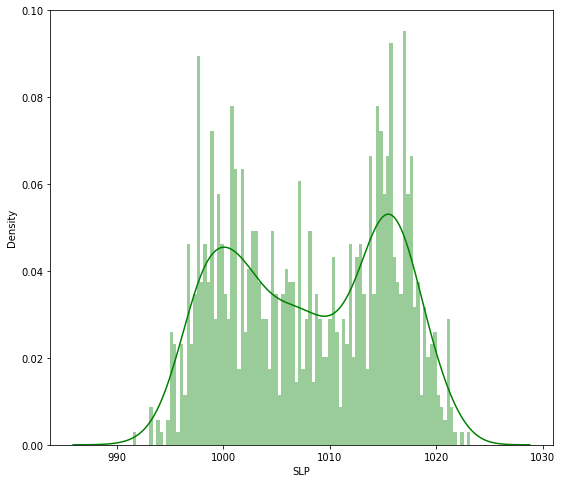

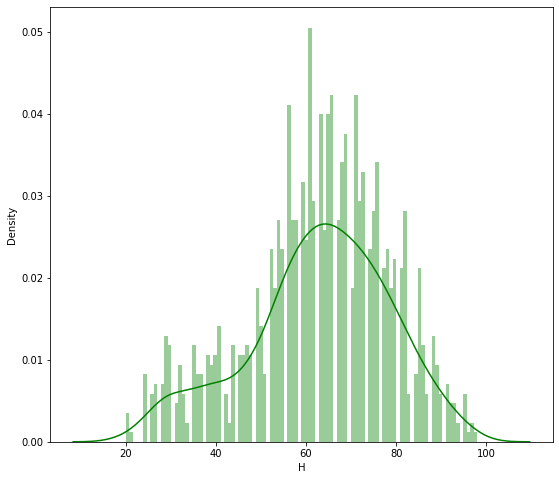

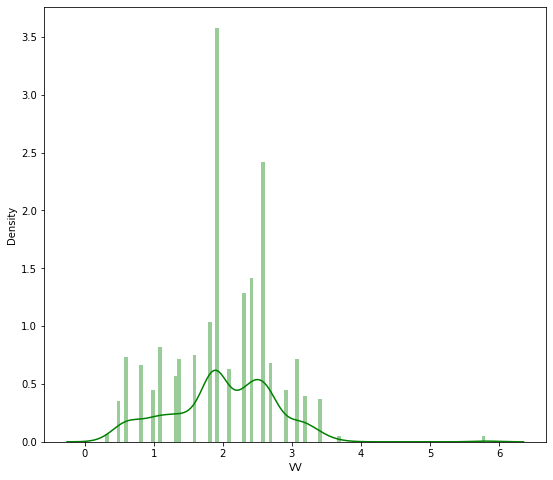

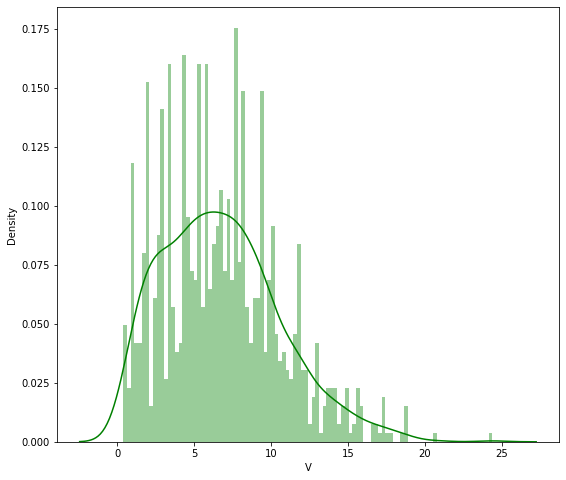

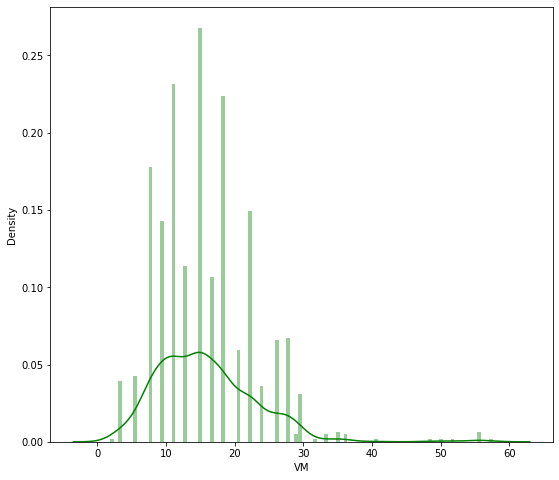

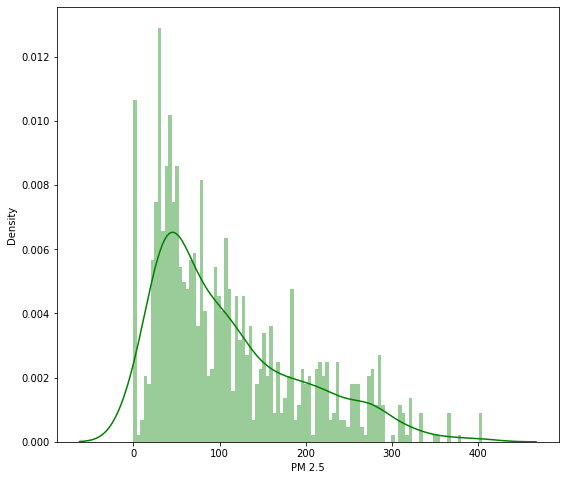

In [11]:
for i in col:
    plt.figure(figsize=(9, 8))
    sns.distplot(df[i], color='g', bins=100, hist_kws={'alpha': 0.4})

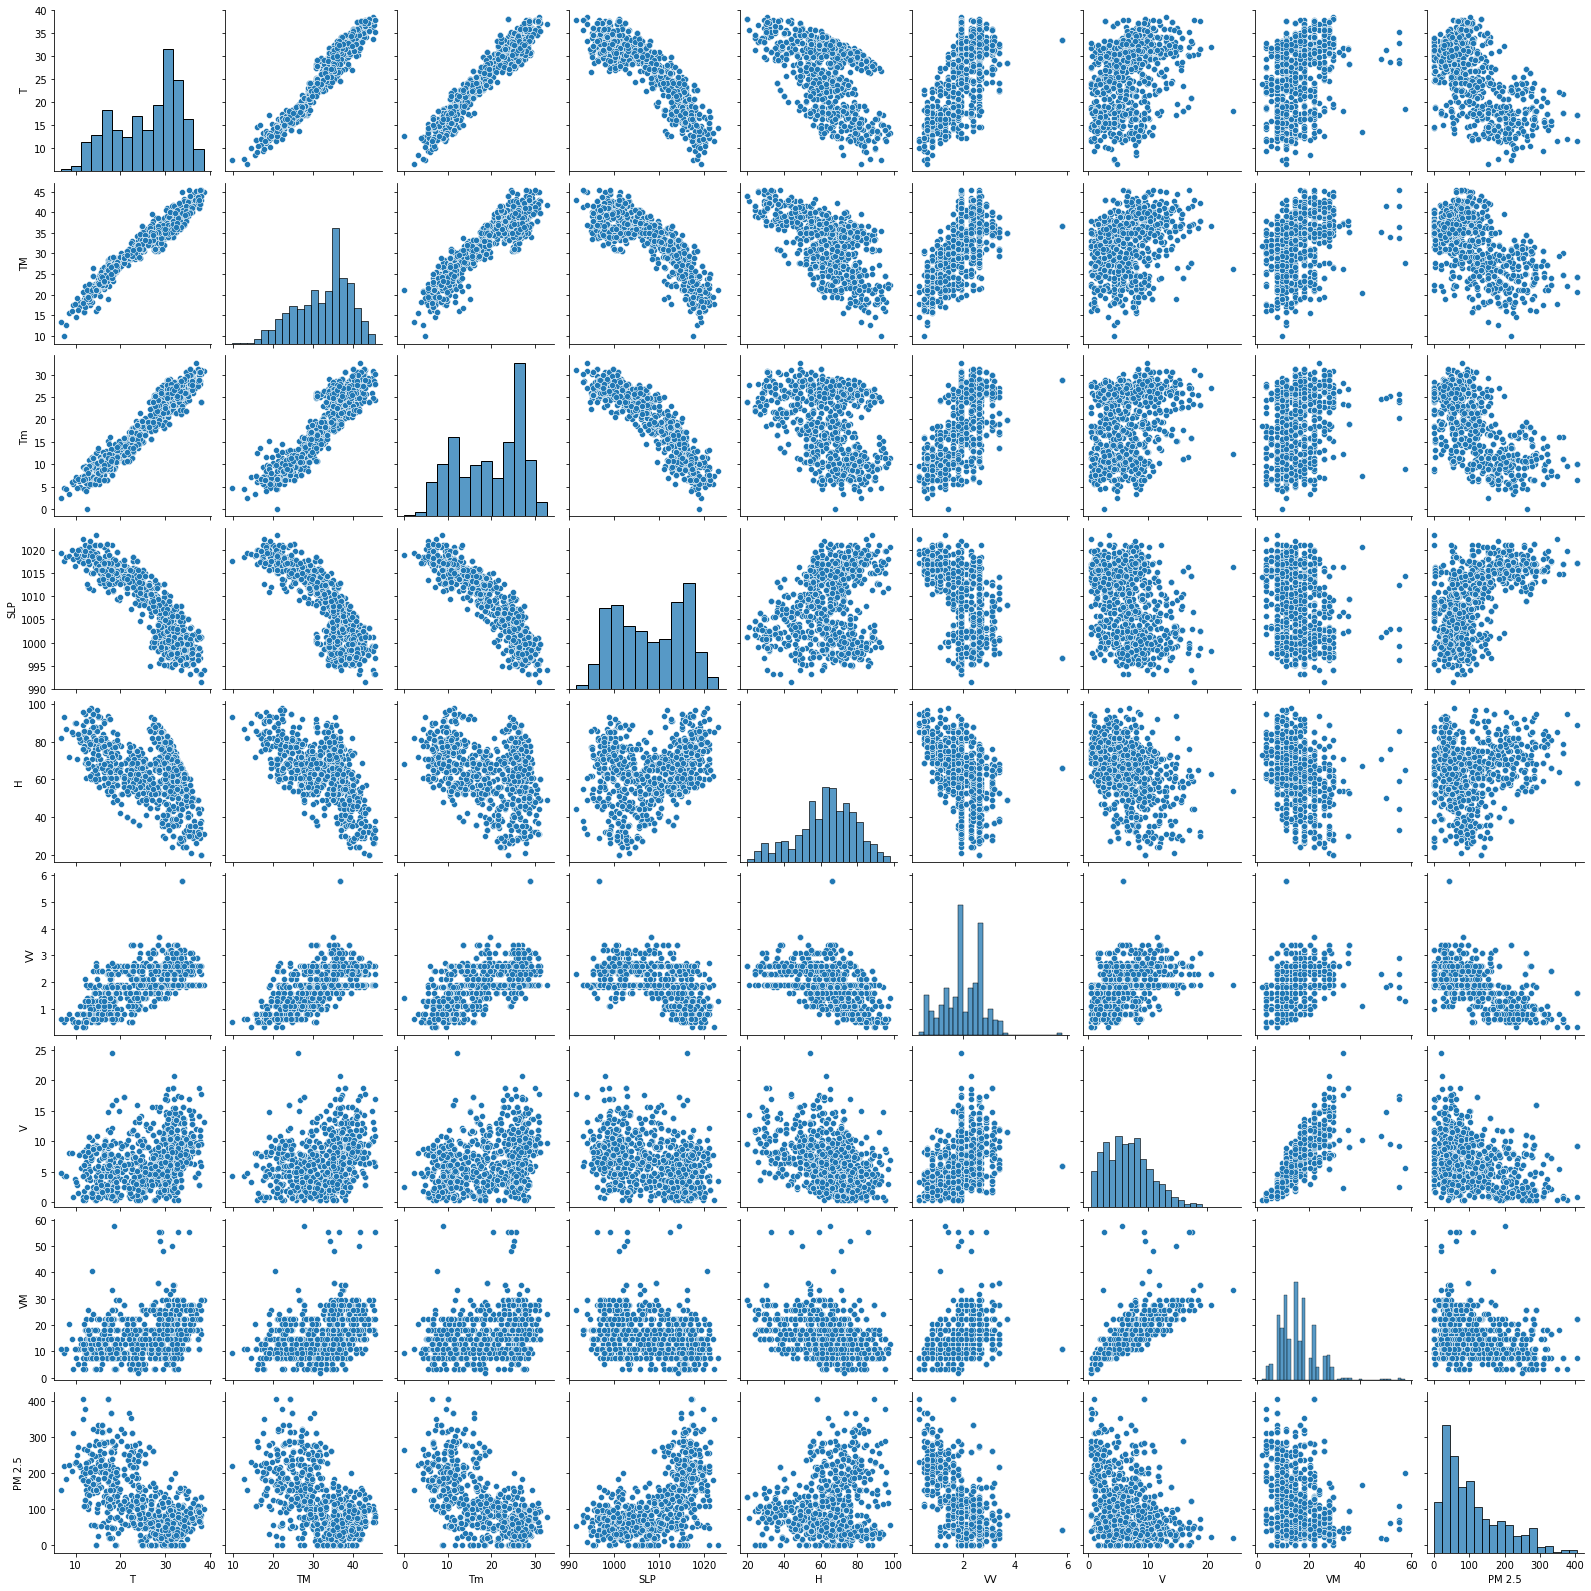

In [12]:
sns.pairplot(df)


In [13]:
relation= df.corr()


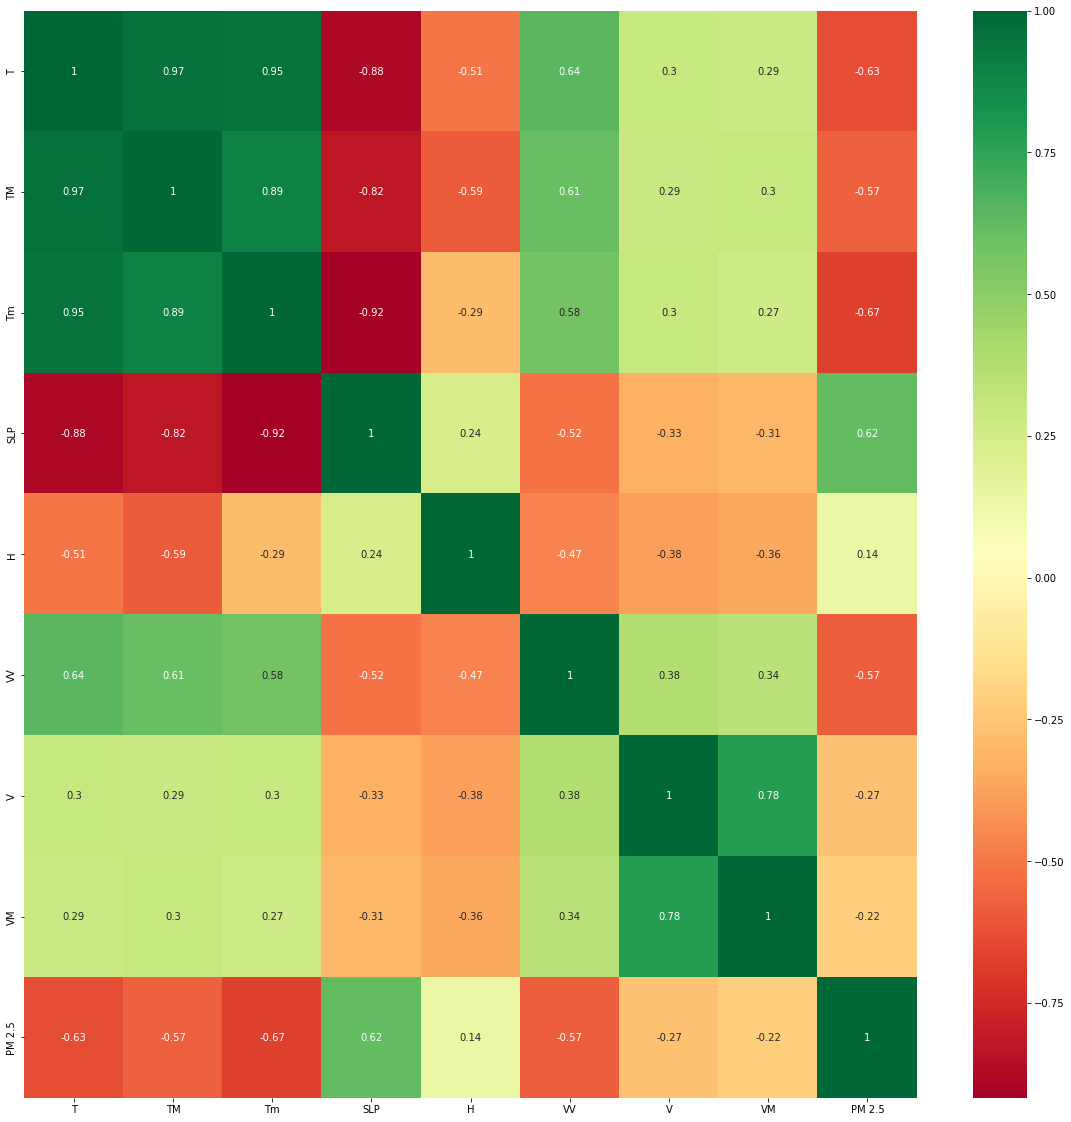

In [14]:
top_corr_features = relation.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
df.head()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [16]:
import scipy.stats as stat
import pylab

In [17]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

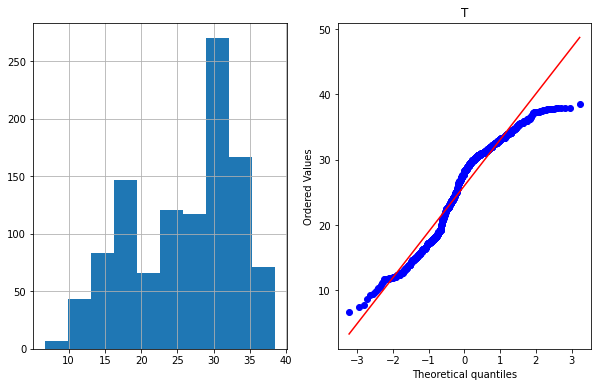

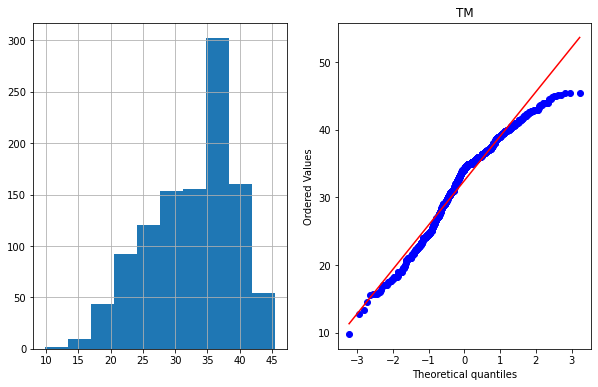

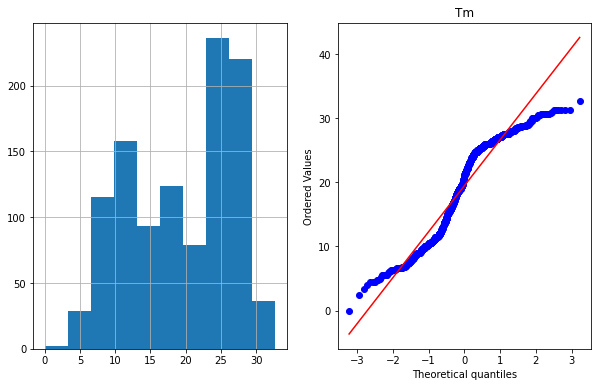

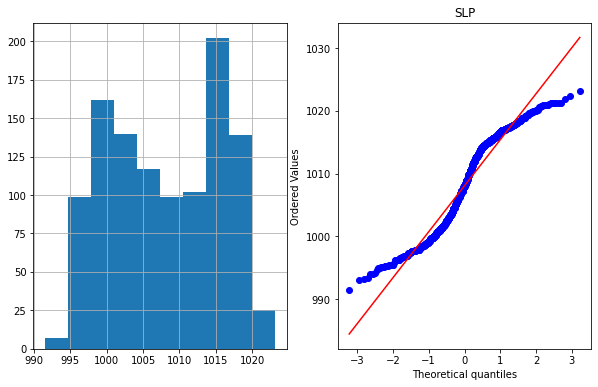

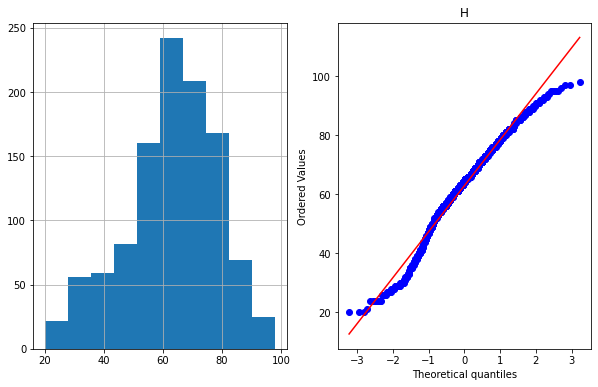

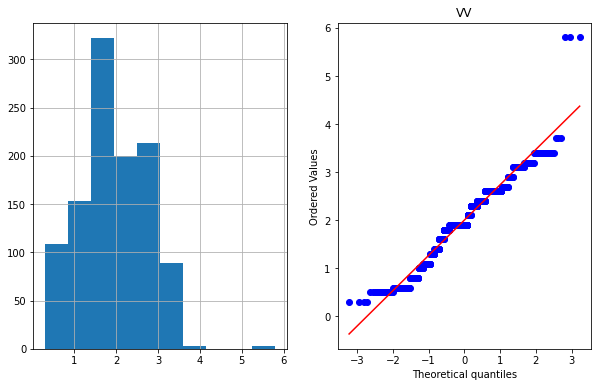

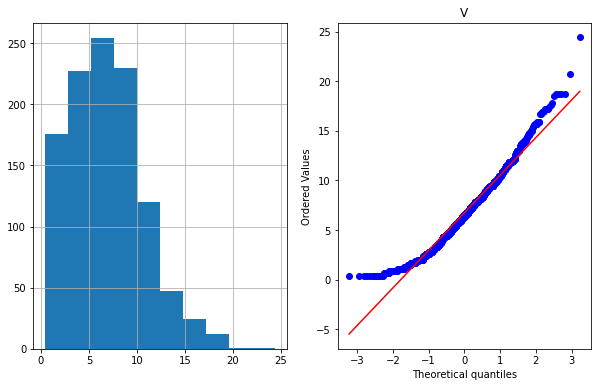

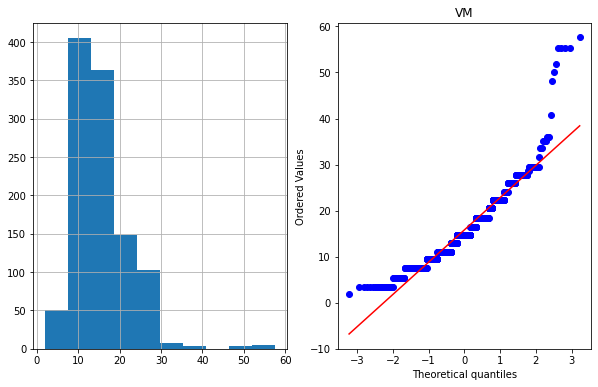

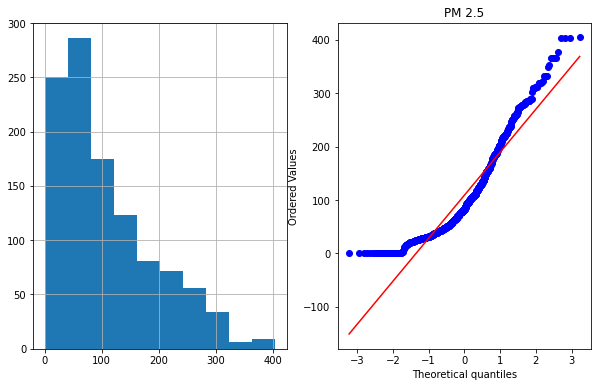

In [18]:
for i in col:
    plot_curve(df,i)

In [19]:
x=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)


[0.17291787 0.10806922 0.21596462 0.12970674 0.0871996  0.18971582
 0.0522589  0.04416722]


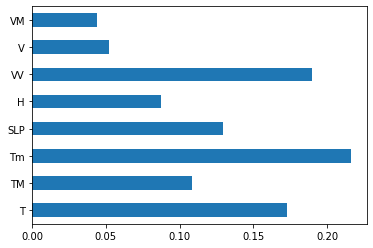

In [22]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
scale= StandardScaler()


In [25]:
x= scale.fit_transform(x)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression


In [28]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
regressor.coef_


array([-19.4518069 ,   3.08146824, -28.7481916 ,  -0.33800614,
       -19.01139337, -29.98355782,  -9.73855923,   4.10277353])

In [30]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 0.551516808175875


In [32]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [33]:
score.mean()


0.4710569304807395

In [34]:
prediction=regressor.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


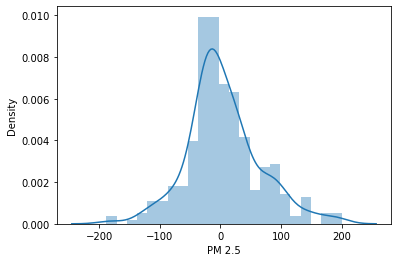

In [35]:
sns.distplot(y_test-prediction)


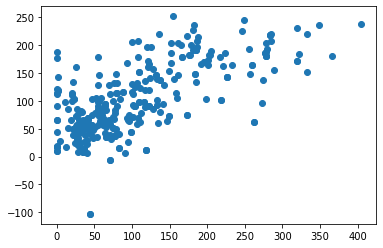

In [36]:
plt.scatter(y_test,prediction)


In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 44.83624126628638
MSE: 3687.543030932419
RMSE: 60.725143317512384


In [38]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, prediction))

r2_score is 0.4852533130856789


In [39]:
from xgboost import XGBRegressor


In [40]:
xg= XGBRegressor()


In [41]:
from sklearn.model_selection import RandomizedSearchCV


In [42]:
### First we will define various parameters and their values used in XGB Regressor


In [43]:
# No.of Estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
# Different learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
print(learning_rate)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
print(subsample)
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]
print(min_child_weight)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['0.05', '0.1', '0.2', '0.3', '0.5', '0.6']
[5, 10, 15, 20, 25, 30]
[0.7, 0.6, 0.8]
[3, 4, 5, 6, 7]


In [44]:
param= {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}
print(param)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [45]:
xgb_random= RandomizedSearchCV(estimator = xg, param_distributions = param,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [46]:
xgb_random.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[14:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.5s
[14:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.1s
[14:23:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.0s
[14:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, sub

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
xgb_random.best_params_


{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.05'}

In [48]:
xgr = XGBRegressor(subsample= 0.8,
 n_estimators= 1100,
 min_child_weight= 3,
 max_depth= 30,
 learning_rate= 0.05)

In [49]:
xgr.fit(X_train,y_train)


[14:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, max_depth=30, min_child_weight=3,
             n_estimators=1100, subsample=0.8)

In [50]:
predictions=xgr.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


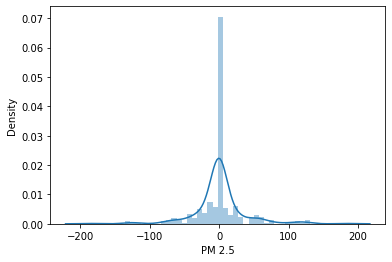

In [51]:
sns.distplot(y_test-predictions)


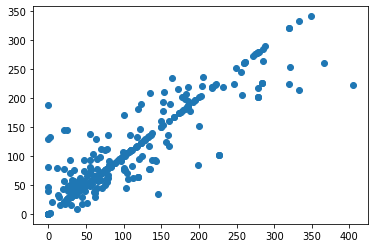

In [52]:
plt.scatter(y_test,predictions)


In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18.649655196185762
MSE: 1309.619991201808
RMSE: 36.18867213924556


In [54]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, predictions))

r2_score is 0.8171892379470249


In [55]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [56]:
from sklearn.model_selection import RandomizedSearchCV


In [57]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [58]:
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [59]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [60]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
!pip install tpot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.6 MB/s 
     |████████████████████████████████| 255.9 MB 42 kB/s 
     |████████████████████████████████| 139 kB 56.8 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=1add71fc5cbecda3b90f37e25813f804f010cc5e3c0f25dc91f58864e28d3003
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [63]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


In [64]:
from tpot import TPOTRegressor


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [66]:
from sklearn.model_selection import RepeatedKFold


In [67]:
# define evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [68]:
# define search
model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)

In [69]:
# perform the search
model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -20.954153947899215

Generation 2 - Current best internal CV score: -20.806991648266788

Generation 3 - Current best internal CV score: -20.806991648266788

Generation 4 - Current best internal CV score: -20.806991648266788

Generation 5 - Current best internal CV score: -20.756506849844573

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=47, p=2, weights=distance)


TPOTRegressor(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
              generations=5, n_jobs=-1, population_size=50, random_state=1,
              scoring='neg_mean_absolute_error', verbosity=2)

In [70]:
print(model.score(X_test, y_test))


-20.67101894691969


In [71]:
model.fitted_pipeline_


Pipeline(steps=[('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=47, weights='distance'))])

In [72]:
pred= model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


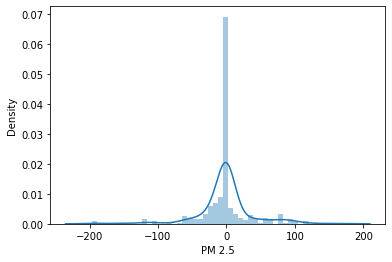

In [73]:
sns.distplot(y_test-pred)


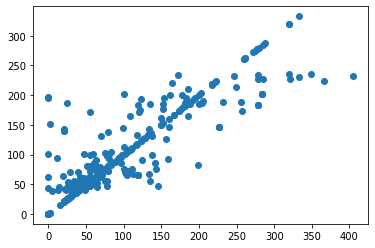

In [74]:
plt.scatter(y_test,pred)


In [75]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 20.67101894691969
MSE: 1634.6726360555754
RMSE: 40.43108502199237


In [76]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, pred))

r2_score is 0.7718149140116357


In [77]:
rf_random.best_params_


{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [78]:
rf1= RandomForestRegressor(n_estimators= 500,
 min_samples_split=  2,
min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth=15)

In [79]:
rf1.fit(X_train,y_train)


RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=500)

In [80]:
ypred= rf1.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


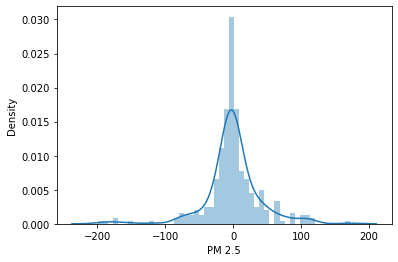

In [81]:
sns.distplot(y_test-ypred)


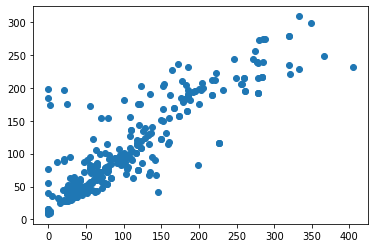

In [82]:
plt.scatter(y_test,ypred)


In [83]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, ypred))
print('MSE:', metrics.mean_squared_error(y_test, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

MAE: 24.686112738779418
MSE: 1670.840105086834
RMSE: 40.875911061245276


In [84]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, ypred))

r2_score is 0.7667662719478686
